The goal of the project is to find the type of glass based on the characteristics of the new glass. To perform preprocessing of the dataset provided for the glass type and get inferences from it Through Data analysis and Visualization Then Train Machine Learning Models/Algorithms.

In [95]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, roc_curve, roc_auc_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


As there is no header we need to add header for the column from description

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", 
                         names=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Id number: 1 to 214
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) 

1- building_windows_float_processed 
2- building_windows_non_float_processed 
3- vehicle_windows_float_processed 
4- vehicle_windows_non_float_processed (none in this database) 
5- containers 
6- tableware 
7- headlamps

In [4]:
df.shape

(214, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.dtypes     

ID        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
#check if there any null value
df.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No null values present in the dataset

In [8]:
df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The columns RI, Na are near normal distribution
columns Mg, and Si are left skewed
Columns Al, Fe are slightly right skewed
columns Ba,Ca,K are right skewed

In [9]:
#look for unique values of type
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

<Axes: xlabel='Type', ylabel='count'>

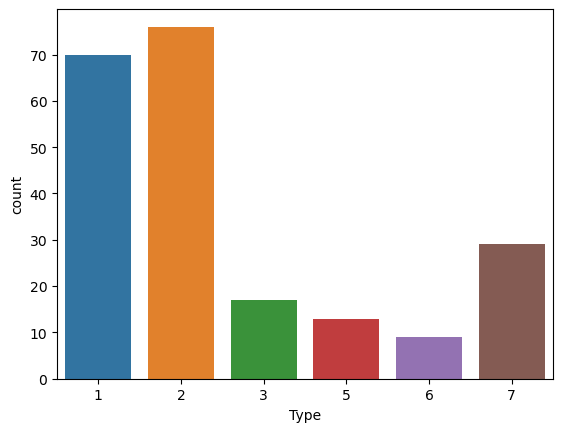

In [10]:
sns.countplot(data=df, x="Type")

Here we can see top type of glasses are 1(Building_windows_float_processed), 2(Building_windows_non_float_processed), and 7(Headlamps)

In [11]:
 df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [12]:
#Checking Skewness of the dataset
df.skew()

ID      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [13]:
# As id is not required for analysis I would be droping down the column id
df.drop('ID', axis=1, inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


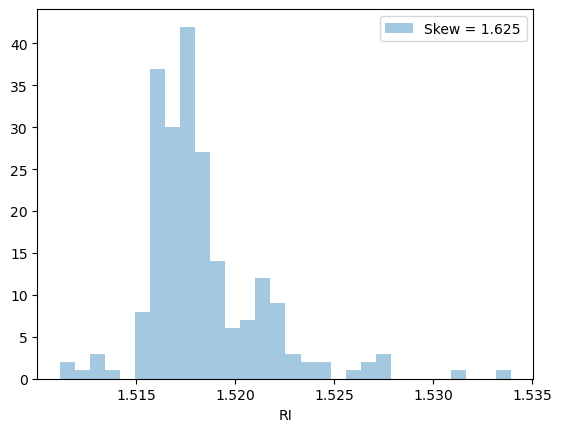

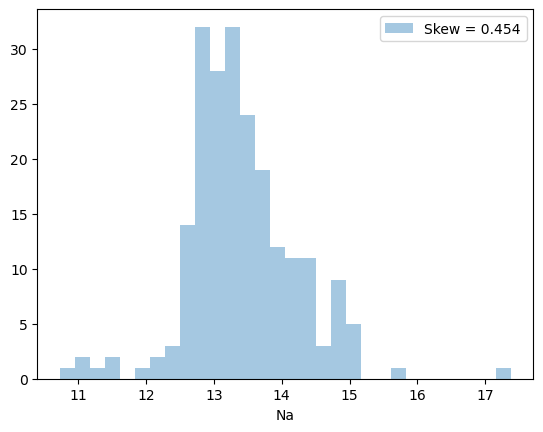

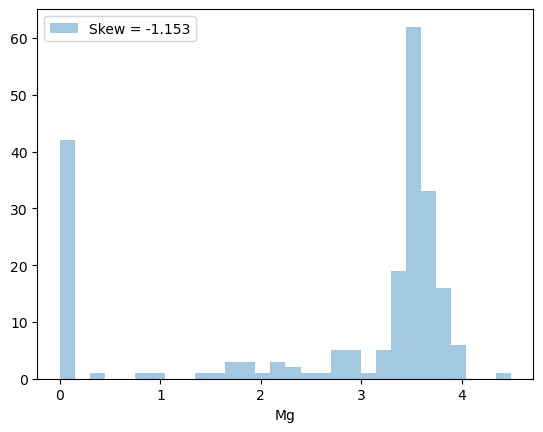

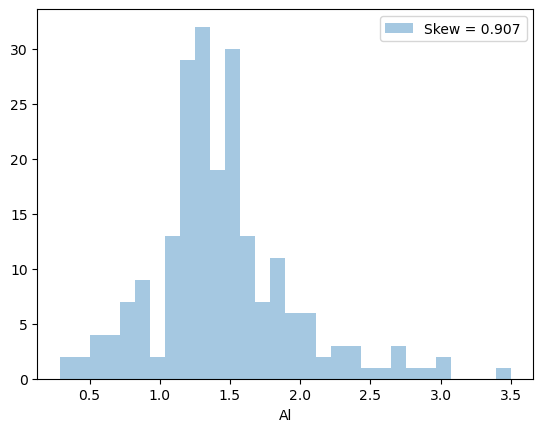

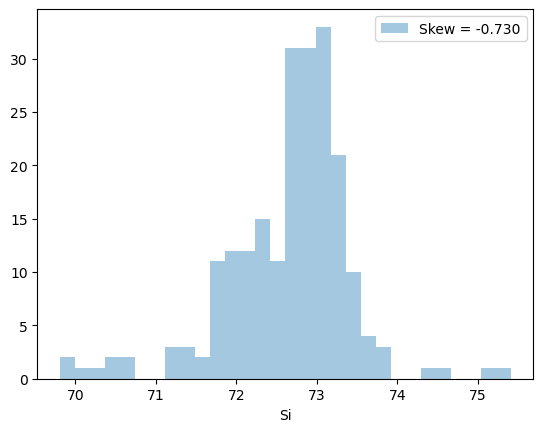

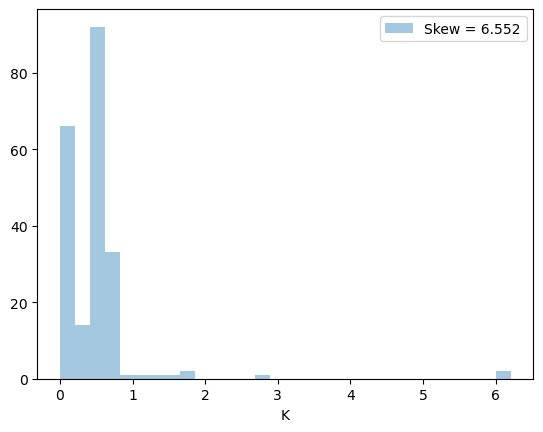

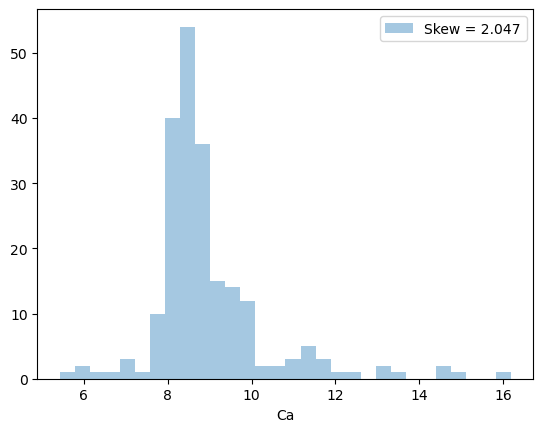

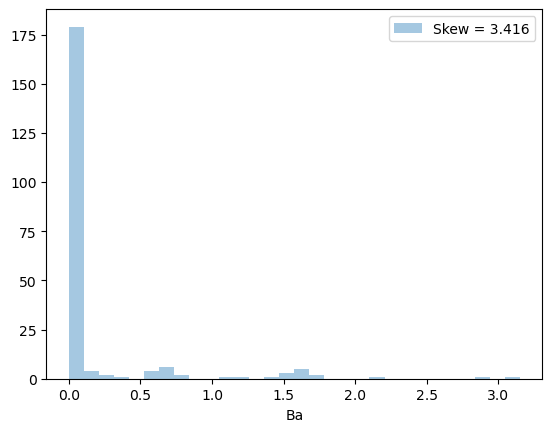

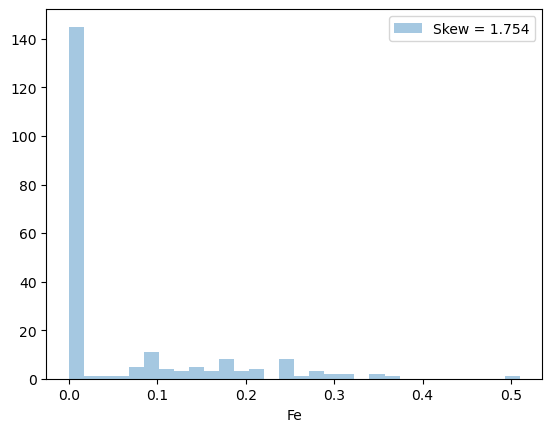

In [14]:
# Plotting the different columns for checking their distribution
for i in df.columns[:-1].tolist():
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Ri, K, Ba and Fe is right skewed.....
Si is left skewed.....
Na, Al and Ca is normal.....
Mg is negatively skewed to left

Multivariate Plots

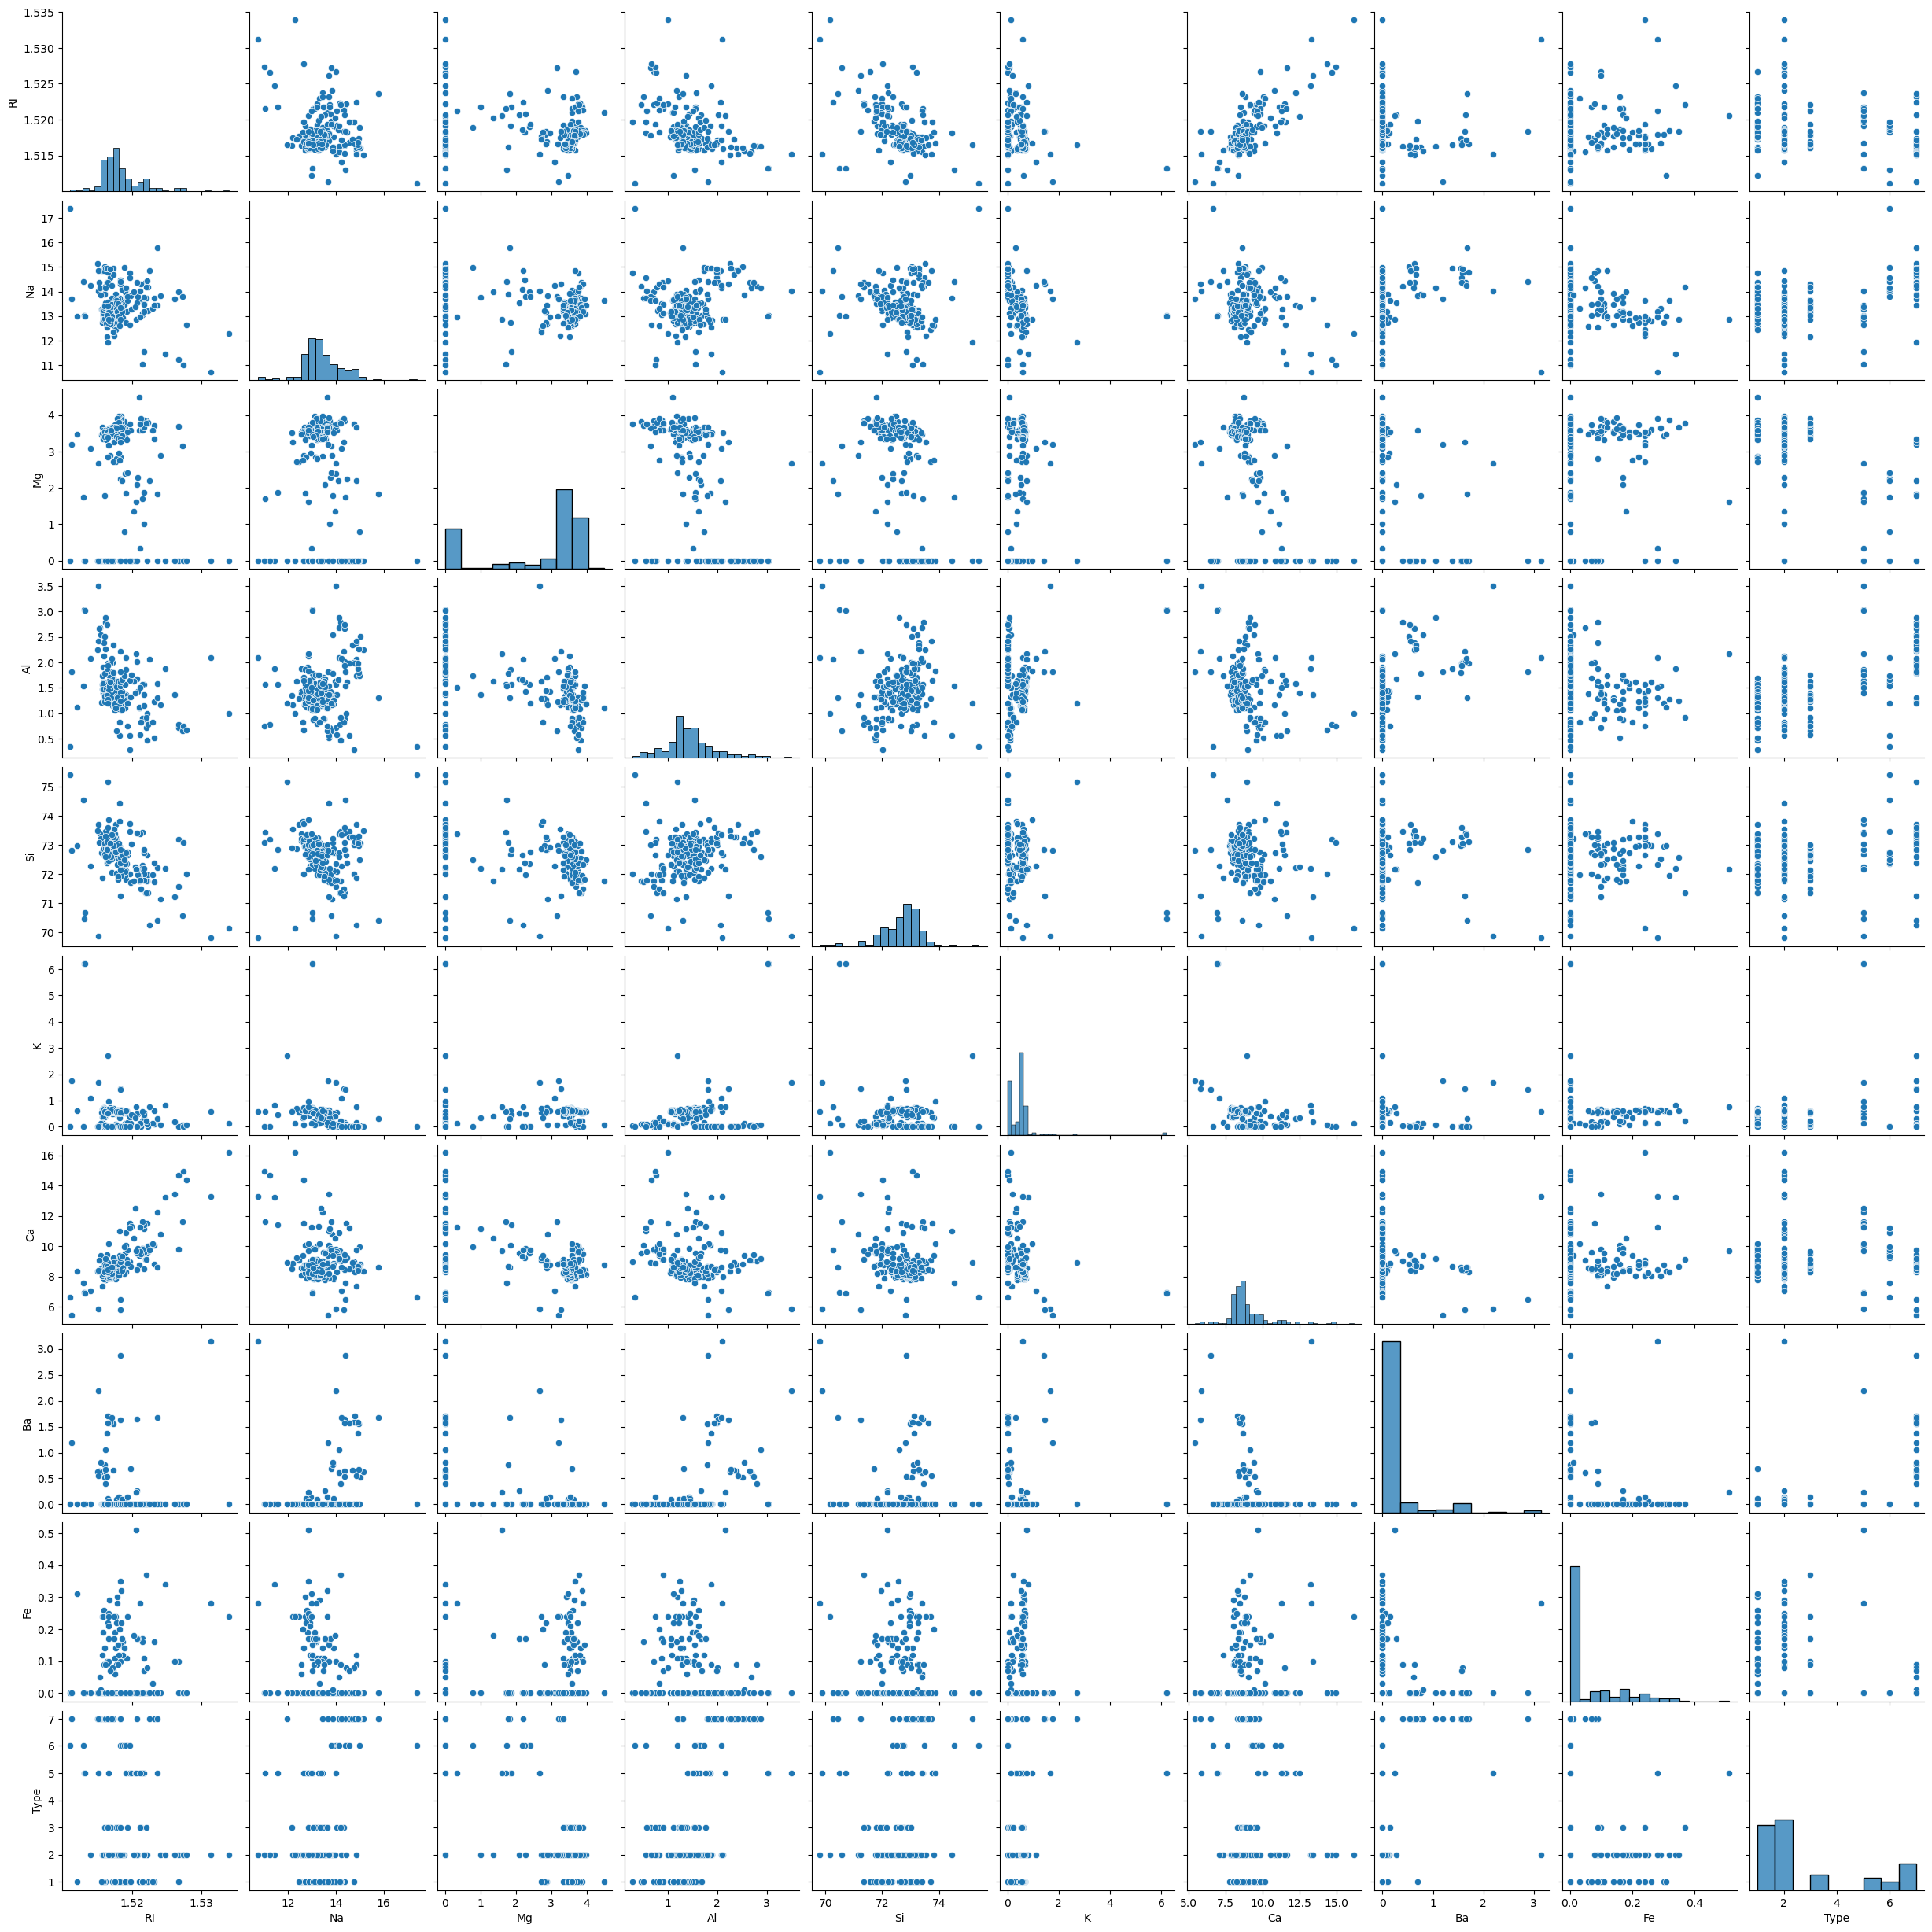

In [15]:
sns.pairplot(df)
plt.show()

Correlation between the columns

In [16]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

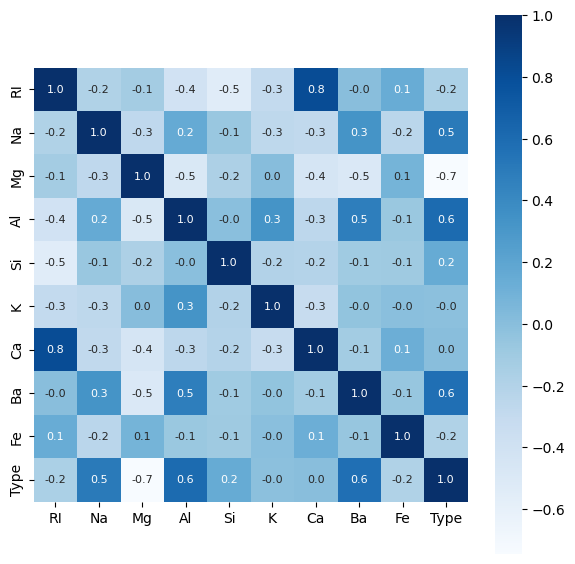

In [17]:
plt.figure(figsize=(7,7))
#sns.heatmap(data,colourbar,squareshape,fmt=onefloatvalue,annot_kws=columnnamesize,cmap=colouryouchoose)
sns.heatmap(df.corr(), cbar=True, square=True, annot=True, fmt='0.1f', cmap="Blues", annot_kws={'size':8})

AI and Ba have intermediate correlation between each other.
RI and Ca have strong correlation between each other.

In [18]:
# just get the correlation with Type and other columns in ascending order
df.corr()['Type'].sort_values(ascending = False)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64

Mg is 74.5% negatively correlated with Type
Fe is 18.825% negatively correlated with Type
Si, and Ca are having least correlation with Type
Si is 15.15% positively less correlated
Na is 50.28% positively moderately correlated
Ba is 57.51% positively moderately correlated
Al is 59.88% positively moderately correalted
RI is 16.42% negatively less correlated

RI         Axes(0.125,0.53;0.110714x0.35)
Na      Axes(0.257857,0.53;0.110714x0.35)
Mg      Axes(0.390714,0.53;0.110714x0.35)
Al      Axes(0.523571,0.53;0.110714x0.35)
Si      Axes(0.656429,0.53;0.110714x0.35)
K       Axes(0.789286,0.53;0.110714x0.35)
Ca         Axes(0.125,0.11;0.110714x0.35)
Ba      Axes(0.257857,0.11;0.110714x0.35)
Fe      Axes(0.390714,0.11;0.110714x0.35)
Type    Axes(0.523571,0.11;0.110714x0.35)
dtype: object

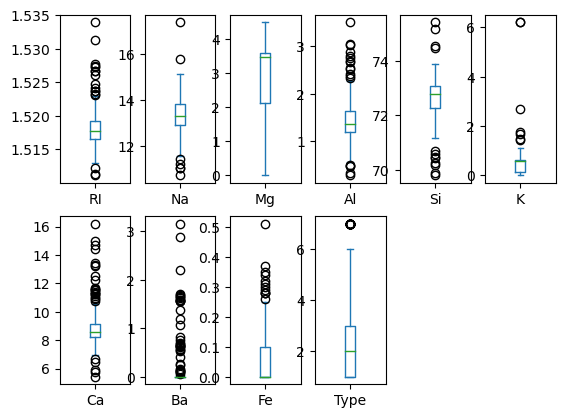

In [19]:
# Detecting the outliers by box plot
# Taking Box plot
df.plot(kind='box', subplots=True, layout=(2,6))

we can see that RI, Na, Al, Si, K, Ca, Ba, Fe are having outliers

now lets seperate dependent and independent columns to X and Y

In [20]:
X=df.drop(columns =['Type'])
Y=df['Type']

In [21]:
# Treating Outliers
from scipy.stats import zscore
z=np.abs(zscore(X))
z.shape

(214, 9)

In [22]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [23]:
x=X[(z<3).all(axis=1)]
x.shape

(194, 9)

In [24]:
y=Y[(z<3).all(axis=1)]
y.shape

(194,)

In [25]:
# calculating percentage data loss
loss=(214-194)/214*100
loss

9.345794392523365

The outliers are removed because the dataloss is less than the 10%

In [26]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

lets remove the skew

In [27]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 3.46944695e-17,  3.75144846e-01,  2.29506682e+00, ...,
         1.11819938e-03, -4.29499500e-01, -6.77737203e-01],
       [-3.46944695e-18,  7.32539190e-01,  5.87338331e-01, ...,
        -1.05715663e+00, -4.29499500e-01, -6.77737203e-01],
       [-2.08166817e-17,  2.14037622e-01,  5.07711174e-01, ...,
        -1.11977966e+00, -4.29499500e-01, -6.77737203e-01],
       ...,
       [-1.38777878e-17,  2.08782892e+00, -1.94767390e+00, ...,
        -3.81688285e-01,  2.49873753e+00, -6.77737203e-01],
       [ 3.12250226e-17,  1.37327598e+00, -1.94767390e+00, ...,
        -3.36777926e-01,  2.49875343e+00, -6.77737203e-01],
       [-1.73472348e-17,  1.39968197e+00, -1.94767390e+00, ...,
        -2.92174639e-01,  2.49873007e+00, -6.77737203e-01]])

In [28]:
# checking again whether skewness is removed or not
sk=pd.DataFrame(X)
sk.skew()

RI    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

Model the data

lets find the StandardScaler for better result where it is the data preprocessing step for numerical features

In [42]:
sc=StandardScaler()
x_scaler=sc.fit_transform(X)
x_scaler

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [30]:
y.value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type, dtype: int64

In [31]:
# As the dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Y=df['Type'].apply(lambda y_value: 1 if y_value >= 5 else 0)
Y

0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: Type, Length: 214, dtype: int64

In [32]:
# So now we must have only 0 and 1 
Y.value_counts()

0    163
1     51
Name: Type, dtype: int64

Finding Best Random State

In [43]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(x_scaler,Y,test_size = 0.2, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.8559003445660791 on Random_state 97


In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(x_scaler,Y,test_size = 0.2, random_state=97)

LogisticRegression

In [102]:
Scores = []

for i in range(1):
    logReg = LogisticRegression(random_state=97)
    logReg.fit(X_train, Y_train)
    score = logReg.score(X_test,Y_test)
    predlr=lr.predict(X_test)
    Scores.append(score)
    
print(logReg.score(X_train,Y_train))
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))
print(Scores)

0.935672514619883
[[33  3]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.70      1.00      0.82         7

    accuracy                           0.93        43
   macro avg       0.85      0.96      0.89        43
weighted avg       0.95      0.93      0.93        43

[1.0]


DecisionTreeClassifier

In [105]:
Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=97)
    tree.fit(X_train, Y_train)
    score = tree.score(X_test,Y_test)
    predtree=tree.predict(X_test)
    Scores.append(score)

print(tree.score(X_train,Y_train))
print(Scores)

1.0
[1.0]


KNeighborsClassifier

In [100]:
Scores = []

for i in range (2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    score = knn.score(X_test,Y_test)
    predknn=knn.predict(X_test)
    Scores.append(score)

print(knn.score(X_train,Y_train))
print(Scores)

0.8888888888888888
[0.9534883720930233, 1.0, 0.9767441860465116, 0.9767441860465116, 0.9534883720930233, 0.9534883720930233, 0.9767441860465116, 1.0, 1.0]


In [104]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'KNN'],
    'Score': [(logReg.score(X_train,Y_train))*100,
              (tree.score(X_train,Y_train))*100,
              (knn.score(X_train,Y_train))*100]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.000000,Decision Tree
93.567251,Logistic Regression
88.888889,KNN


Out of all above models:
Decision Tree

Decision tree is overfitting with :->

Training accuracy: 1.0

Testing accuracy: 1.0

Cross valuation helps to Evaluate the scores

In [106]:
scr=cross_val_score(tree,X,Y,cv=2)
scr

array([0.78504673, 0.87850467])

In [107]:
print("The Cross Validation Score of Logistic Regression Model is: ",scr.mean())

The Cross Validation Score of Logistic Regression Model is:  0.8317757009345794


In [110]:
roc_auc_score(Y_test,predtree)

1.0

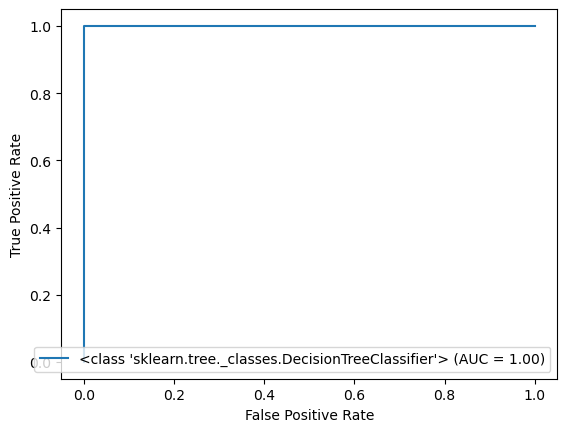

In [112]:
fpr, tpr, thresholds=metrics.roc_curve(Y_test,predtree)
auc=metrics.auc(fpr,tpr)
view=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc,estimator_name=DecisionTreeClassifier)
view.plot()

Saving the model

In [113]:
import joblib
joblib.dump(lr, "Glass_Identification.pkl")

['Glass_Identification.pkl']

# Out of all above models:
Decision Tree

Decision tree is overfitting with :->

Training accuracy: 1.0

Testing accuracy: 1.0